In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

### Bessel

In [12]:
bessel = pd.DataFrame({'a_1':[18, 15, 14, 14, 12, 11.5, 13],
                       'a_1_':[23.5, 30, 36, 42, 57, 78, 45],
                       'a_2':[24, 29, 35, 41.5, 57, 78, 45],
                       'a_2_':[17.5, 16, 14, 13.5, 12.5, 11.5, 13]
                        })

bessel['L'] = (bessel.a_1 + bessel.a_2 + bessel.a_1_ + bessel.a_2_) / 2
bessel['l'] = ( - bessel.a_1 + bessel.a_2 + bessel.a_1_ - bessel.a_2_) / 2
bessel['f'] = (bessel.L ** 2 - bessel.l ** 2) / (4 * bessel.L)
print(np.mean(bessel.f), np.std(bessel.f))
# bessel.to_excel("bessel.xlsx")
bessel

10.127814558049378 0.10073672726369795


,a_1,a_1_,a_2,a_2_,L,l,f
0,18.0,23.5,24.0,17.5,41.50,6.00,10.158133
1,15.0,30.0,29.0,16.0,45.00,14.00,10.161111
2,14.0,36.0,35.0,14.0,49.50,21.50,10.040404
3,14.0,42.0,41.5,13.5,55.50,28.00,10.343468
4,12.0,57.0,57.0,12.5,69.25,44.75,10.083032
5,11.5,78.0,78.0,11.5,89.50,66.50,10.022346
6,13.0,45.0,45.0,13.0,58.00,32.00,10.086207


### shpere abberation

[-0.26666667  7.26666667] [1.26600356e-15 3.01922606e-15]


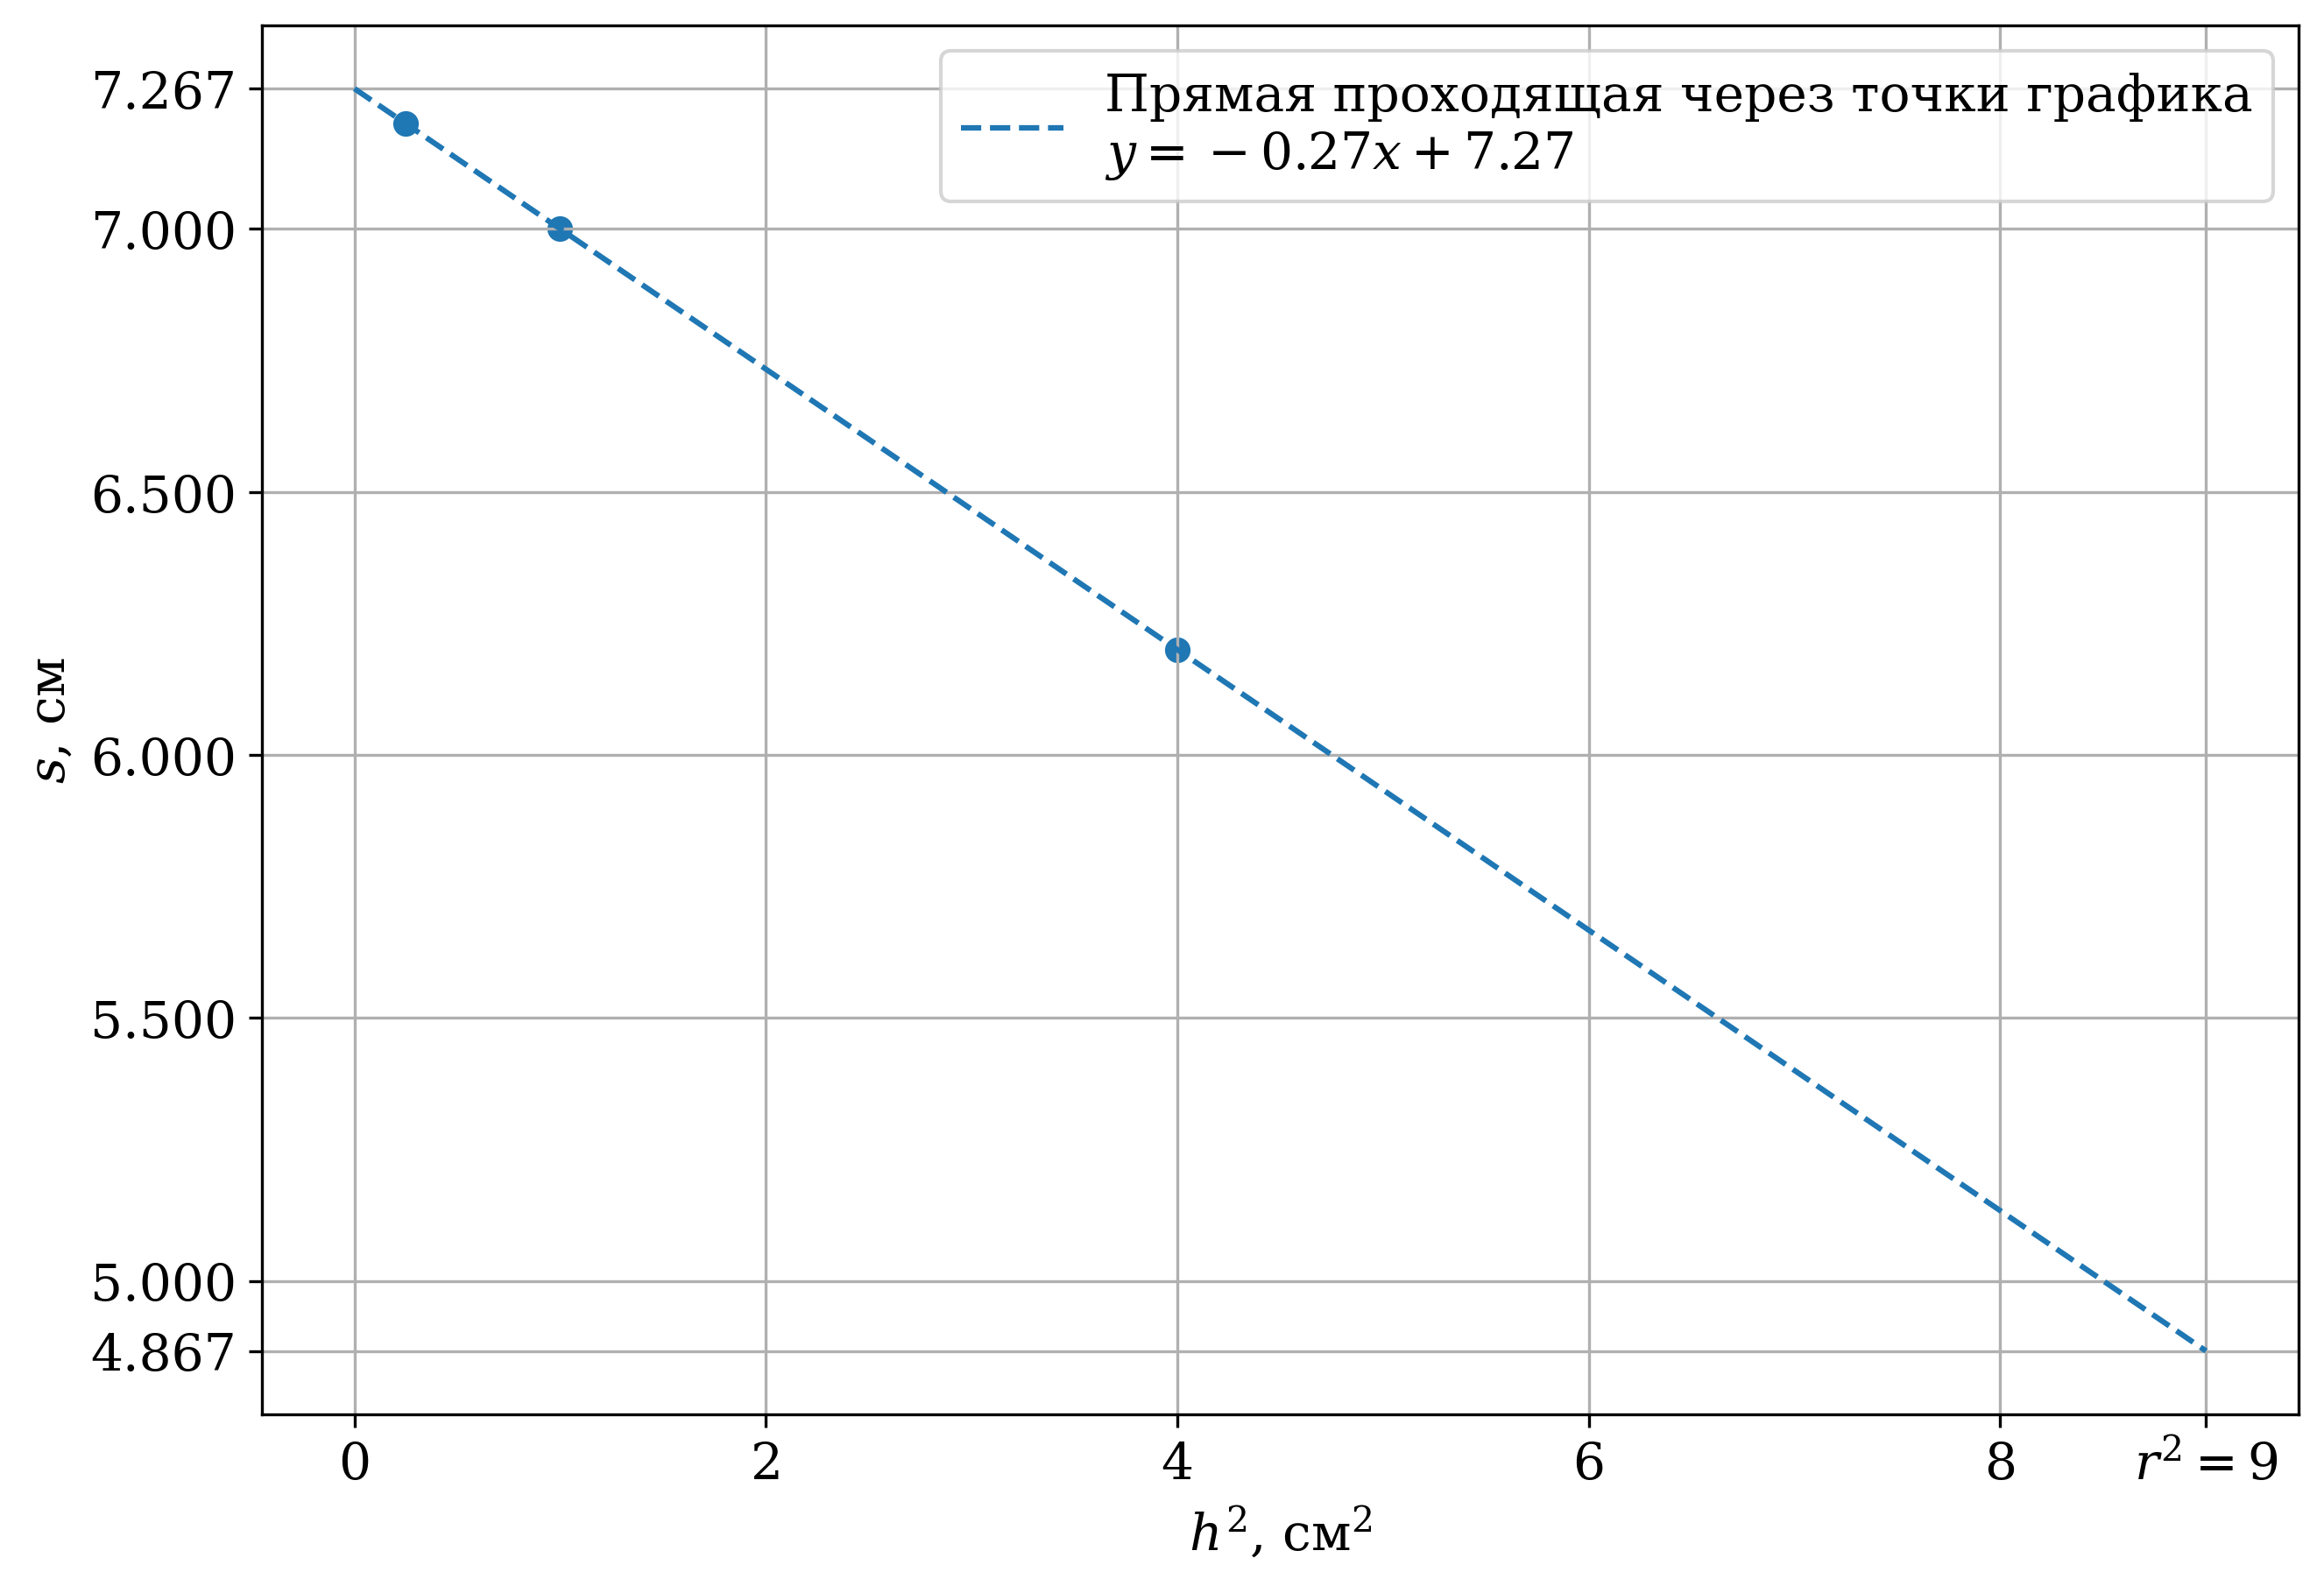

In [33]:
s = np.array([7.2, 7, 6.2])
h = np.array([0.5, 1, 2])

plt.scatter(h ** 2, s)
# plt.plot(h ** 2, s, ls='--', alpha=0.5)

arg, cov = np.polyfit(h**2, s, 1, cov=True)
print(arg, np.sqrt(cov.diagonal()))
f = np.poly1d(arg)
r = np.array([0, 3])
plt.plot(r ** 2, f(r ** 2), ls='--',label="Прямая проходящая через точки графика\n$y = {:.2f} x + {:.2f}$".format(arg[0], arg[1]))
plt.xticks([0, 2, 4, 6, 8, 9], [0, 2, 4, 6, 8, "$r^2 = 9$"])
plt.yticks([f(9), 5, 5.5, 6, 6.5, 7, f(0)])
plt.xlabel("$h^2$, см$^2$")
plt.ylabel("$s$, см")
plt.legend()

plt.savefig("sphere.pdf")